In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import pandas as pd

plt.rcParams.update({"font.size" : 15, "font.family" : "serif"})

### Задача 6

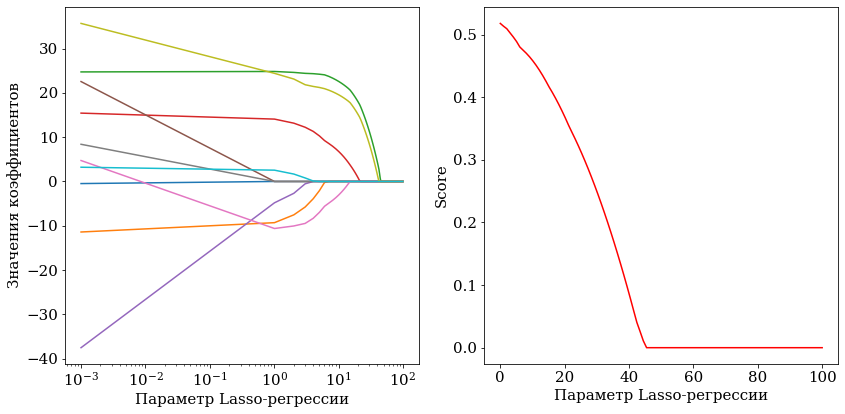

In [258]:
X, y = load_diabetes(return_X_y=True)
ss = StandardScaler()

X_new = ss.fit_transform(X)

alpha = np.linspace(0.001, 100, 100)
result = []
score = []

for a in alpha:
    reg = Lasso(alpha=a)
    reg.fit(X_new, y)
    result.append(reg.coef_)
    score.append(reg.score(X_new, y))

result = np.array(result).T


plt.figure(figsize=(12, 6))
plt.subplot(121)
for r in result:
    plt.semilogx(alpha, r)
plt.xlabel("Параметр Lasso-регрессии")
plt.ylabel("Значения коэффициентов")

plt.subplot(122)
plt.plot(alpha, score, color="red")
plt.xlabel("Параметр Lasso-регрессии")
plt.ylabel("Score")

plt.tight_layout()

### Задача 5

Сложим несколько гармоник, добавим шум, аппроксимируем

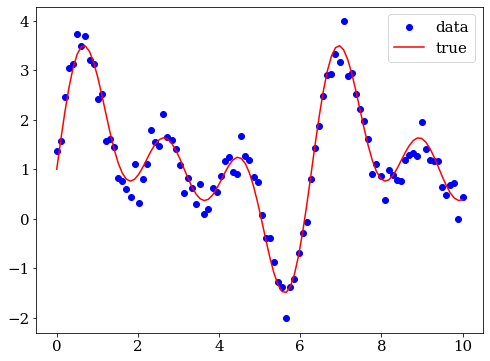

In [259]:
x = np.linspace(0, 10, 100)
y0 = 1 + np.sin(x) + np.sin(2*x) + np.sin(3*x)
y = y0 + np.random.normal(loc=0.0, scale=0.25, size=len(x))

plt.figure(figsize=(8, 6))
plt.scatter(x, y, color="blue", label="data")
plt.plot(x, y0, color="red", label="true")
plt.legend()

Ну ниче так кривулька получилась, попробуем её аппроксимировать моделью

$\hat{y}(x) = \theta_0 + \theta_1 \sin x + \theta_2 \sin 2x + \theta_3 \sin 3x$

Функция потерь примет вид 

$L = ||y-X\theta||^2+ \lambda \sum |\theta_i|$, где в $X$ стоят соответствующие пересчитанные значения

In [260]:
X = []
for t in x:
    X.append([np.sin(t), np.sin(2*t), np.sin(3*t), 1])
X = np.array(X)
X

array([[ 0.        ,  0.        ,  0.        ,  1.        ],
       [ 0.10083842,  0.20064886,  0.2984138 ,  1.        ],
       [ 0.20064886,  0.39313661,  0.56963411,  1.        ],
       [ 0.2984138 ,  0.56963411,  0.78894546,  1.        ],
       [ 0.39313661,  0.72296256,  0.93636273,  1.        ],
       [ 0.48385164,  0.84688556,  0.99845223,  1.        ],
       [ 0.56963411,  0.93636273,  0.96955595,  1.        ],
       [ 0.64960951,  0.98775469,  0.85230712,  1.        ],
       [ 0.72296256,  0.99897117,  0.65739025,  1.        ],
       [ 0.78894546,  0.96955595,  0.40256749,  1.        ],
       [ 0.84688556,  0.90070545,  0.11106004,  1.        ],
       [ 0.8961922 ,  0.79522006, -0.19056796,  1.        ],
       [ 0.93636273,  0.65739025, -0.47483011,  1.        ],
       [ 0.96698762,  0.49282204, -0.7158225 ,  1.        ],
       [ 0.98775469,  0.30820902, -0.89158426,  1.        ],
       [ 0.99845223,  0.11106004, -0.98609877,  1.        ],
       [ 0.99897117, -0.

In [261]:
# Реализация градиентного спуска на этом чудном датасете(подходит для Lasso)
def cost(theta, X, y, alpha):
    return (X@theta - y).T @ (X@theta - y) + alpha * np.sum(np.abs(theta))

def grad_cost(theta, X, y, alpha):
    return 2*theta@X.T@X - 2*y@X + alpha * np.sign(theta)


class gradient_descent:
    def __init__(self, alpha=1.0, lr=1.0, theta=np.array([1.0, 1.0, 1.0, 1.0]), max_iter=100):
        self.alpha_ = alpha
        self.lr_ = lr
        self.theta_ = np.array(theta)
        self.max_iter_ = max_iter
    
    def fit(self, X, y):
        for _ in range(self.max_iter_):
            self.theta_ -= self.lr_ * grad_cost(self.theta_, X, y, self.alpha_)
    
    
    def predict(self, X):
        return self.theta_@X.T
    
    
    def score(self, X, y):
        return 1 - np.linalg.norm(self.predict(X) - y, ord=2)/np.linalg.norm(y-y.mean(), ord=2)
    
    
# def grad(x, ):
#     return [1 + p*np.sign()]

In [273]:
reg = gradient_descent(lr=0.001, alpha=10.0, theta=[0.0, -0.5, 2.2, 1.0])
reg.fit(X, y)
print(reg.theta_)
print(reg.score(X, y))

[0.81238015 0.90057938 0.95992697 0.96029766]
0.7707374628898654


Text(0.5, 1.0, '$\\alpha=10.0,\\; lr=0.001, \\; R^2 = 0.77$')

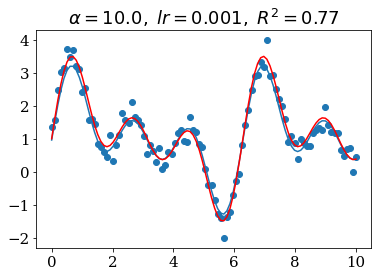

In [275]:
plt.plot(x, reg.predict(X))
plt.scatter(x, y)
plt.plot(x, y0, color="red")
plt.title("$\\alpha=10.0,\; lr=0.001, \; R^2 = 0.77$")

In [264]:
lr = np.linspace(0.0001, 0.0005, 20)
alpha = np.linspace(0.0, 100.0, 20)


det = np.zeros(shape=(len(alpha), len(lr)))

for a, i in zip(alpha, range(len(alpha))):
    temp = []
    for l, j in zip(lr, range(len(lr))):
        reg = gradient_descent(lr=l, alpha=a, theta=[1.0, 0.5, 0.2, 1.0])
        reg.fit(X, y)
        det[i][j] = reg.score(X, y)

Text(0, 0.5, 'alpha')

<Figure size 864x864 with 0 Axes>

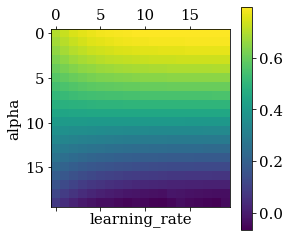

In [270]:
plt.figure(figsize=(12, 12))
plt.matshow(det)
plt.colorbar()
plt.xlabel("learning_rate")
plt.ylabel("alpha")

In [278]:
#Хз как в sklearn это засунуть, могу на месте что-нибудь с кросс-валидацией реализовать. 